In [1]:
library(survival)
library(MASS)
library(openxlsx)
library(corrplot)
library(rworldmap)

Warning message:
“package ‘survival’ was built under R version 3.6.2”
corrplot 0.84 loaded

Loading required package: sp

### Welcome to rworldmap ###

For a short introduction type : 	 vignette('rworldmap')



In [2]:
library(psych)

In [3]:
# 警告メッセージ非表示
options(warn=-1)

In [4]:
df <- read.csv("../../data/data_covid_fix_name_code_coordinate_ltaly.csv")
df <- na.omit(df)
head(df)

,X,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,cumul,air,code3,code2,lat,lon,dist_italy
,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,1,Albania,2866376,60.319,13364.155,6996524,7.84,8.005411,7.67,70,74.3,1,108641,303.14,ALB,AL,41.327546,19.818698,613446.0
2,2,Algeria,42228429,72.629,15481.788,9108277,4.99,5.201489,4.77,58,12.0,1,80272,6442.44,DZA,DZ,36.753768,3.058756,993497.7
3,3,Angola,30809762,65.514,6452.355,10490120,5.40,5.979936,4.83,83,17.9,1,303691,76.94,AGO,AO,-8.839988,13.289437,5618975.4
4,4,Argentina,44494502,91.870,20610.569,19025624,6.86,8.044600,5.67,65,74.9,1,92122,1516.63,ARG,AR,-34.603684,-58.381559,11131591.5
6,6,Australia,24992369,86.012,51663.365,7608913,8.62,9.160533,8.07,26,97.3,1,1347,75667.65,AUS,AU,-35.308129,149.124402,16215969.4
7,7,Austria,8847037,58.297,55454.689,7103537,8.48,9.245685,7.71,58,73.2,1,80272,12935.50,AUT,AT,48.208174,16.373819,764147.8


In [5]:
# データを感染の大小で分ける
early_country <- df[df$date_first < 40, ]
late_country <- df[df$date_first > 40, ]

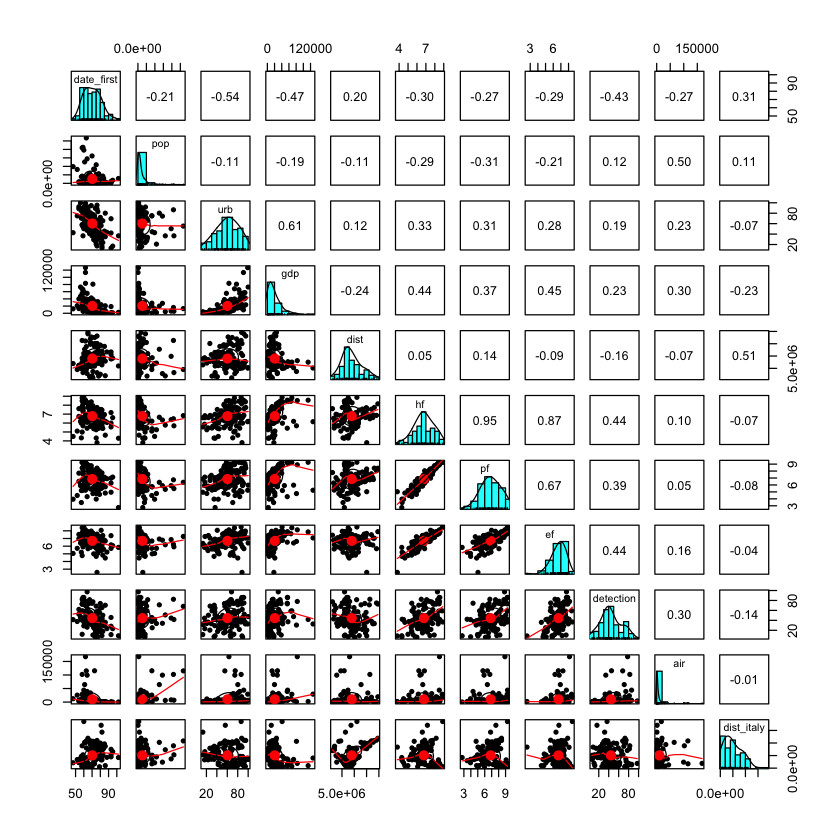

In [6]:
# 正規化なし
pairs.panels(late_country[c('date_first', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'detection', 'air', 'dist_italy')])

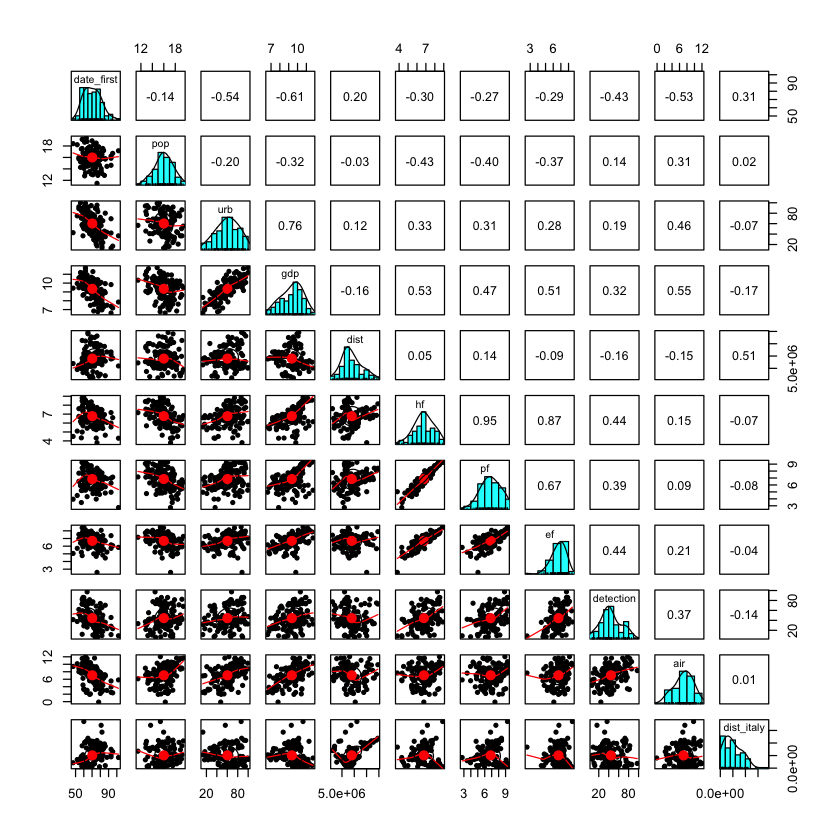

In [7]:
# 正規化あり
tmp <- late_country
tmp$air <- log(tmp$air )
tmp$pop <- log(tmp$pop )
tmp$gdp <- log(tmp$gdp )
pairs.panels(tmp[c('date_first', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'detection', 'air' ,'dist_italy')])

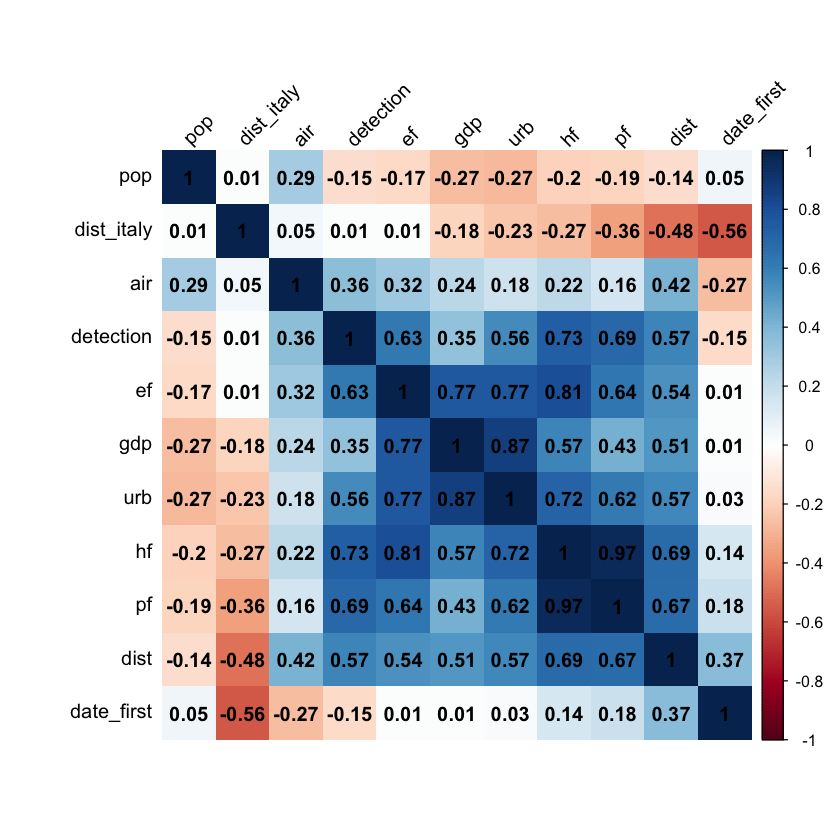

In [8]:
late_cor <- cor(early_country[c('date_first', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'detection', 'air',  'dist_italy')])
corrplot(late_cor, method="shade", shade.col=NA, tl.col="black", tl.srt=45,
         addCoef.col="black", order="AOE")

# 生存時間解析

In [9]:
Y_early <- Surv(early_country$date_first, early_country$status ==1)
Y_late <- Surv(late_country$date_first, late_country$status ==1)

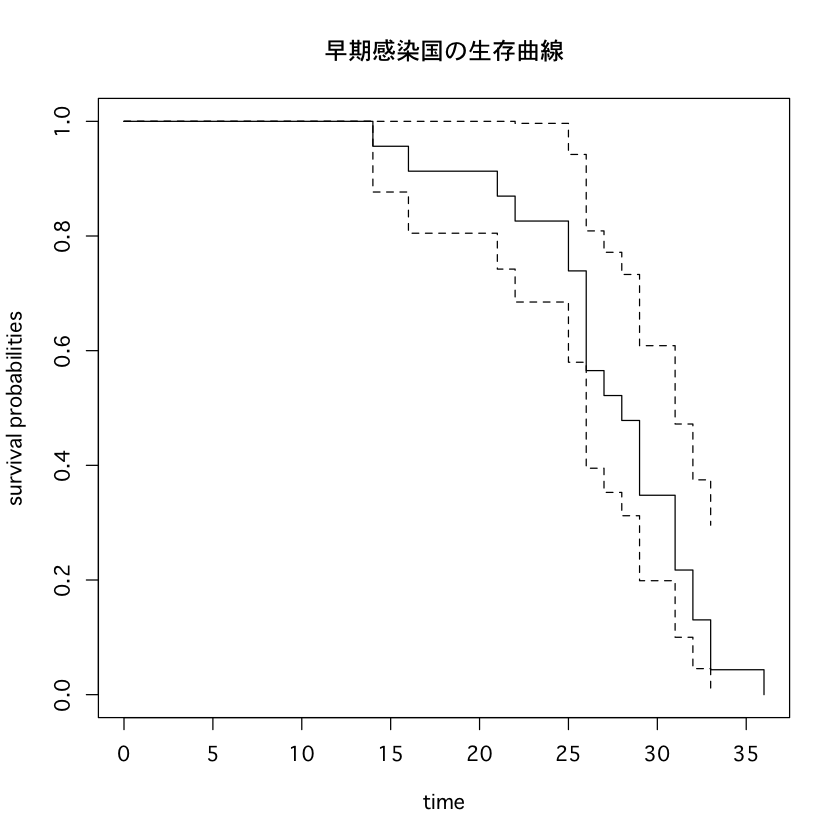

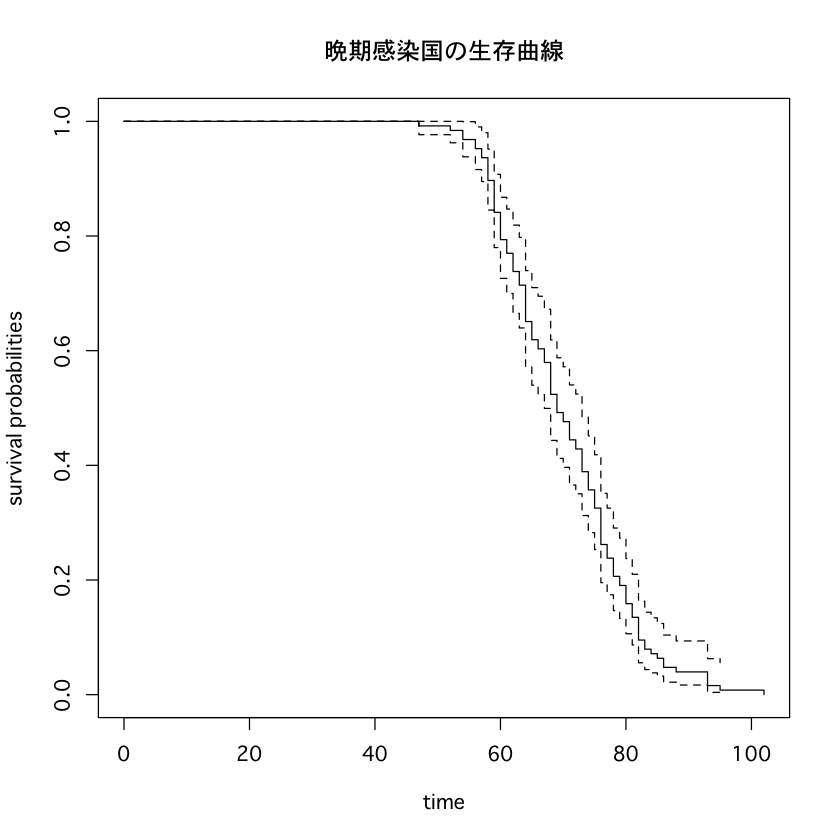

In [10]:
# KM
par(family="Osaka")
kmfit_early = survfit(Y_early ~ 1)
plot(kmfit_early,  mark.t=TRUE, xlab="time", ylab = "survival probabilities", main="早期感染国の生存曲線")

kmfit_late = survfit(Y_late ~ 1)
plot(kmfit_late,  mark.t=TRUE, xlab="time", ylab = "survival probabilities", main="晩期感染国の生存曲線")

## 晩期感染国に対してのcox

### 正規化なし

In [11]:
stepAIC(coxph(Y_late ~ hf + pop + gdp + urb + dist + air + detection+dist_italy ,data = late_country))

Start:  AIC=891.44
Y_late ~ hf + pop + gdp + urb + dist + air + detection + dist_italy

             Df    AIC
- dist        1 889.60
<none>          891.44
- air         1 892.22
- hf          1 896.26
- gdp         1 897.73
- dist_italy  1 898.18
- urb         1 901.09
- detection   1 901.09
- pop         1 911.50

Step:  AIC=889.6
Y_late ~ hf + pop + gdp + urb + air + detection + dist_italy

             Df    AIC
<none>          889.60
- air         1 890.33
- hf          1 894.91
- gdp         1 896.13
- dist_italy  1 897.43
- detection   1 899.14
- urb         1 902.98
- pop         1 909.84


Call:
coxph(formula = Y_late ~ hf + pop + gdp + urb + air + detection + 
    dist_italy, data = late_country)

                 coef  exp(coef)   se(coef)      z        p
hf          2.839e-01  1.328e+00  1.087e-01  2.611  0.00901
pop         1.484e-08  1.000e+00  2.881e-09  5.153 2.57e-07
gdp         1.828e-05  1.000e+00  5.643e-06  3.239  0.00120
urb         2.207e-02  1.022e+00  5.666e-03  3.896 9.80e-05
air        -7.514e-06  1.000e+00  4.878e-06 -1.540  0.12349
detection   1.785e-02  1.018e+00  5.181e-03  3.445  0.00057
dist_italy -8.654e-08  1.000e+00  2.833e-08 -3.055  0.00225

Likelihood ratio test=97.82  on 7 df, p=< 2.2e-16
n= 126, number of events= 126 

In [12]:
summary(coxph(formula = Y_late ~ hf + pop + gdp + urb + air + detection + dist_italy, data = late_country))
AIC(coxph(formula = Y_late ~ hf + pop + gdp + urb + air + detection + dist_italy, data = late_country))

Call:
coxph(formula = Y_late ~ hf + pop + gdp + urb + air + detection + 
    dist_italy, data = late_country)

  n= 126, number of events= 126 

                 coef  exp(coef)   se(coef)      z Pr(>|z|)    
hf          2.839e-01  1.328e+00  1.087e-01  2.611  0.00901 ** 
pop         1.484e-08  1.000e+00  2.881e-09  5.153 2.57e-07 ***
gdp         1.828e-05  1.000e+00  5.643e-06  3.239  0.00120 ** 
urb         2.207e-02  1.022e+00  5.666e-03  3.896 9.80e-05 ***
air        -7.514e-06  1.000e+00  4.878e-06 -1.540  0.12349    
detection   1.785e-02  1.018e+00  5.181e-03  3.445  0.00057 ***
dist_italy -8.654e-08  1.000e+00  2.833e-08 -3.055  0.00225 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

           exp(coef) exp(-coef) lower .95 upper .95
hf             1.328     0.7528     1.073     1.644
pop            1.000     1.0000     1.000     1.000
gdp            1.000     1.0000     1.000     1.000
urb            1.022     0.9782     1.011     1.034
air            

[1] 889.599

### 正規化あり

In [13]:
stepAIC(coxph(Y_late ~ hf + log(pop) + log(gdp) + urb + dist + log(air) + detection+dist_italy ,data = late_country))

Start:  AIC=892.42
Y_late ~ hf + log(pop) + log(gdp) + urb + dist + log(air) + detection + 
    dist_italy

             Df    AIC
- dist        1 890.43
- log(air)    1 891.36
<none>          892.42
- urb         1 892.94
- detection   1 893.03
- log(gdp)    1 893.91
- dist_italy  1 896.96
- hf          1 900.13
- log(pop)    1 903.58

Step:  AIC=890.43
Y_late ~ hf + log(pop) + log(gdp) + urb + log(air) + detection + 
    dist_italy

             Df    AIC
- log(air)    1 889.37
<none>          890.43
- detection   1 891.03
- log(gdp)    1 892.34
- urb         1 892.63
- dist_italy  1 897.41
- hf          1 898.95
- log(pop)    1 901.59

Step:  AIC=889.37
Y_late ~ hf + log(pop) + log(gdp) + urb + detection + dist_italy

             Df    AIC
<none>          889.37
- detection   1 890.94
- urb         1 891.47
- dist_italy  1 895.56
- log(gdp)    1 896.07
- hf          1 897.44
- log(pop)    1 909.22


Call:
coxph(formula = Y_late ~ hf + log(pop) + log(gdp) + urb + detection + 
    dist_italy, data = late_country)

                 coef  exp(coef)   se(coef)      z        p
hf          3.776e-01  1.459e+00  1.240e-01  3.045  0.00232
log(pop)    3.596e-01  1.433e+00  7.774e-02  4.626 3.73e-06
log(gdp)    4.540e-01  1.575e+00  1.533e-01  2.961  0.00307
urb         1.451e-02  1.015e+00  7.241e-03  2.004  0.04506
detection   1.025e-02  1.010e+00  5.366e-03  1.911  0.05602
dist_italy -7.653e-08  1.000e+00  2.753e-08 -2.780  0.00544

Likelihood ratio test=96.05  on 6 df, p=< 2.2e-16
n= 126, number of events= 126 

In [14]:
model_late <- coxph(formula = Y_late ~ hf + log(pop) + log(gdp) + urb + detection + dist_italy, data = late_country)

summary(model_late)
AIC(model_late)

Call:
coxph(formula = Y_late ~ hf + log(pop) + log(gdp) + urb + detection + 
    dist_italy, data = late_country)

  n= 126, number of events= 126 

                 coef  exp(coef)   se(coef)      z Pr(>|z|)    
hf          3.776e-01  1.459e+00  1.240e-01  3.045  0.00232 ** 
log(pop)    3.596e-01  1.433e+00  7.774e-02  4.626 3.73e-06 ***
log(gdp)    4.540e-01  1.575e+00  1.533e-01  2.961  0.00307 ** 
urb         1.451e-02  1.015e+00  7.241e-03  2.004  0.04506 *  
detection   1.025e-02  1.010e+00  5.366e-03  1.911  0.05602 .  
dist_italy -7.653e-08  1.000e+00  2.753e-08 -2.780  0.00544 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

           exp(coef) exp(-coef) lower .95 upper .95
hf             1.459     0.6855    1.1440     1.860
log(pop)       1.433     0.6979    1.2303     1.669
log(gdp)       1.575     0.6351    1.1658     2.127
urb            1.015     0.9856    1.0003     1.029
detection      1.010     0.9898    0.9997     1.021
dist_italy     1.000   

[1] 889.3667

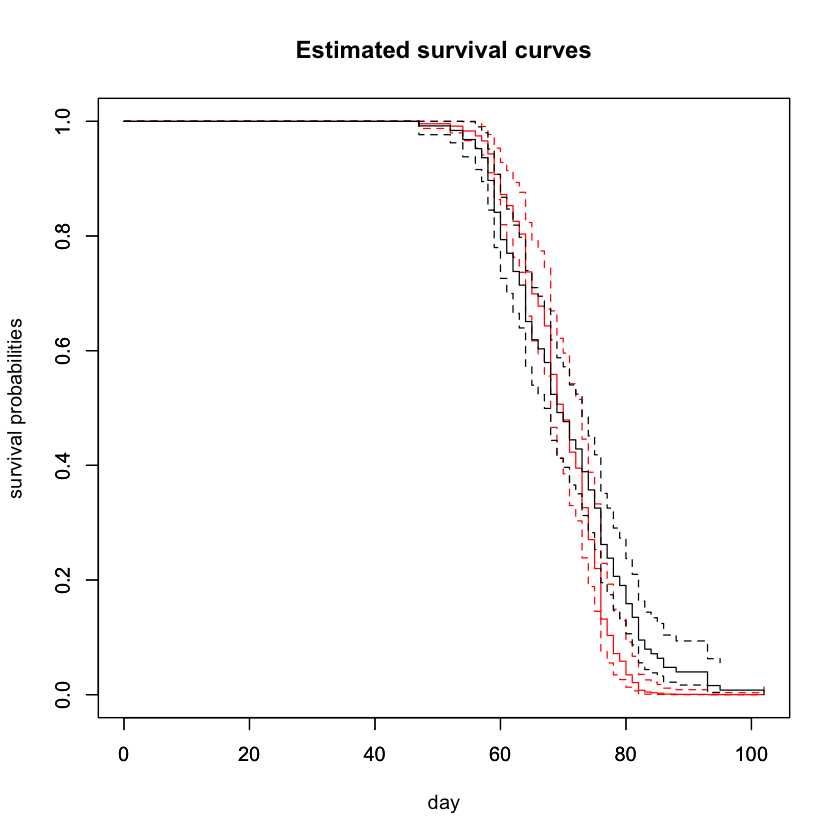

In [15]:
model_late.fit <- survfit(model_late)
plot(model_late.fit, col="red", xlab="day",  ylab = "survival probabilities", main="Estimated survival curves")

 par(new=T) 
 plot(kmfit_late)   

In [16]:
# 比例ハザード性の確認(シェーンフィールド残差)
# 仮説が棄却されると比例ハザードの仮定が充たされていない可能性があることを示唆する。
zph_cluster2<- cox.zph(model_late)
zph_cluster2

              chisq df     p
hf          5.51429  1 0.019
log(pop)    0.44051  1 0.507
log(gdp)    4.17188  1 0.041
urb         4.71264  1 0.030
detection   0.00216  1 0.963
dist_italy  3.19468  1 0.074
GLOBAL     15.85100  6 0.015

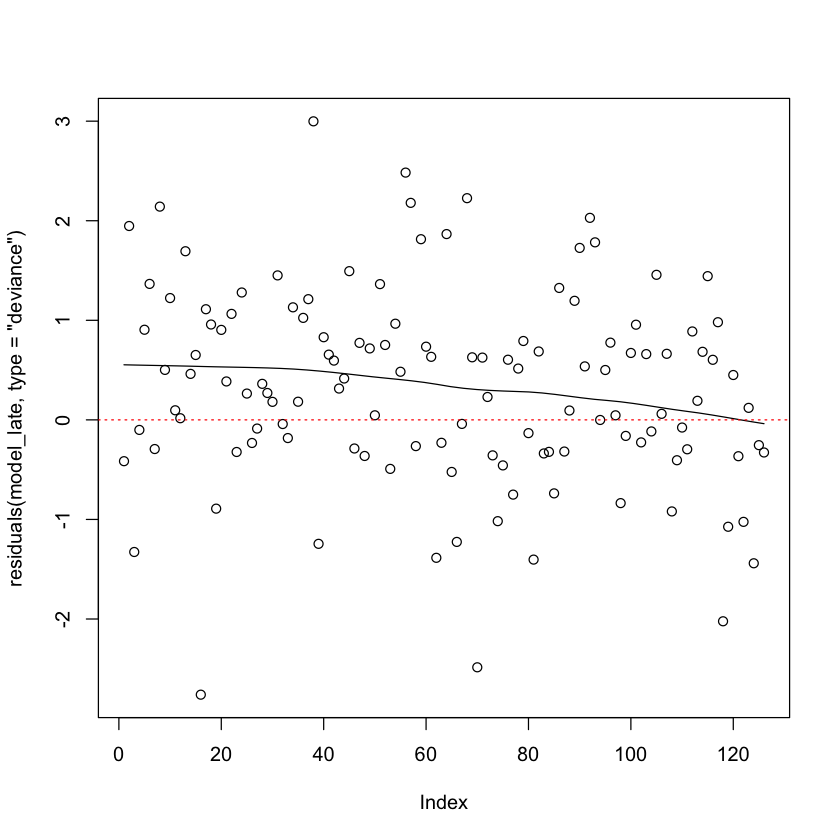

In [17]:
scatter.smooth(residuals(model_late, type="deviance"))
abline(h=0,lty=3,col=2)

In [18]:
as.data.frame(residuals(model_late, type="deviance"))

,"residuals(model_late, type = ""deviance"")"
,<dbl>
1,-0.41498023
2,1.94709109
3,-1.32692482
4,-0.10090832
7,0.90523508
8,1.36557416
9,-0.29291287
10,2.14176160
11,0.50191950


# 重回帰分析

### 早期感染国

In [19]:
step(lm(formula = date_first ~ hf + log(pop) + gdp+ urb + dist + log(air) + detection + dist_italy , data = early_country))

Start:  AIC=76.03
date_first ~ hf + log(pop) + gdp + urb + dist + log(air) + detection + 
    dist_italy

             Df Sum of Sq    RSS    AIC
- hf          1     0.854 287.58 74.098
- log(pop)    1     2.291 289.01 74.213
- gdp         1     2.751 289.47 74.249
- urb         1     7.267 293.99 74.605
- detection   1    11.334 298.06 74.921
- log(air)    1    16.252 302.98 75.298
- dist_italy  1    18.982 305.71 75.504
<none>                    286.72 76.030
- dist        1    74.330 361.05 79.331

Step:  AIC=74.1
date_first ~ log(pop) + gdp + urb + dist + log(air) + detection + 
    dist_italy

             Df Sum of Sq    RSS    AIC
- log(pop)    1     1.443 289.02 72.213
- gdp         1     4.476 292.05 72.453
- urb         1     6.781 294.36 72.634
- dist_italy  1    19.570 307.15 73.612
- log(air)    1    21.351 308.93 73.745
- detection   1    24.796 312.37 74.000
<none>                    287.58 74.098
- dist        1    78.032 365.61 77.620

Step:  AIC=72.21
date_first ~ gdp


Call:
lm(formula = date_first ~ dist + log(air) + dist_italy, data = early_country)

Coefficients:
(Intercept)         dist     log(air)   dist_italy  
  4.455e+01    7.464e-07   -1.721e+00   -4.642e-07  


In [20]:
lm_early <- lm(formula = date_first ~ dist + log(air) + dist_italy, data = early_country)
summary(lm_early)
AIC(lm_early)


Call:
lm(formula = date_first ~ dist + log(air) + dist_italy, data = early_country)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8950 -1.4410 -0.0353  2.0779  7.7889 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.455e+01  6.676e+00   6.673 2.21e-06 ***
dist         7.464e-07  4.201e-07   1.777   0.0916 .  
log(air)    -1.721e+00  6.816e-01  -2.524   0.0207 *  
dist_italy  -4.642e-07  2.432e-07  -1.909   0.0715 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.081 on 19 degrees of freedom
Multiple R-squared:  0.4936,	Adjusted R-squared:  0.4136 
F-statistic: 6.173 on 3 and 19 DF,  p-value: 0.004142


[1] 135.5688

### 晩期感染国

In [21]:
step(lm(date_first ~ hf + log(pop) + log(gdp) + urb + dist + log(air) + detection + dist_italy ,data = late_country))

Start:  AIC=492.03
date_first ~ hf + log(pop) + log(gdp) + urb + dist + log(air) + 
    detection + dist_italy

             Df Sum of Sq    RSS    AIC
- dist        1      5.54 5428.7 490.16
- log(air)    1     22.12 5445.3 490.54
- hf          1     35.36 5458.5 490.85
<none>                    5423.2 492.03
- detection   1    119.78 5542.9 492.78
- urb         1    185.64 5608.8 494.27
- dist_italy  1    342.36 5765.5 497.74
- log(gdp)    1    411.26 5834.4 499.24
- log(pop)    1    549.09 5972.3 502.18

Step:  AIC=490.16
date_first ~ hf + log(pop) + log(gdp) + urb + log(air) + detection + 
    dist_italy

             Df Sum of Sq    RSS    AIC
- log(air)    1     26.43 5455.1 488.77
- hf          1     30.50 5459.2 488.87
<none>                    5428.7 490.16
- detection   1    127.85 5556.6 491.09
- urb         1    196.09 5624.8 492.63
- log(gdp)    1    485.49 5914.2 498.95
- dist_italy  1    528.54 5957.2 499.87
- log(pop)    1    543.60 5972.3 500.18

Step:  AIC=488.77
date


Call:
lm(formula = date_first ~ log(pop) + log(gdp) + urb + detection + 
    dist_italy, data = late_country)

Coefficients:
(Intercept)     log(pop)     log(gdp)          urb    detection   dist_italy  
  1.465e+02   -1.978e+00   -4.086e+00   -9.246e-02   -8.079e-02    5.489e-07  


In [22]:
lm_late <- lm(formula = date_first ~ log(pop) + log(gdp) + urb + detection + dist_italy, data = late_country)
summary(lm_late)
AIC(lm_late)


Call:
lm(formula = date_first ~ log(pop) + log(gdp) + urb + detection + 
    dist_italy, data = late_country)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.4482  -4.5350  -0.0391   2.9727  23.3382 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.465e+02  1.072e+01  13.669  < 2e-16 ***
log(pop)    -1.978e+00  4.229e-01  -4.678 7.67e-06 ***
log(gdp)    -4.086e+00  8.879e-01  -4.602 1.05e-05 ***
urb         -9.246e-02  4.496e-02  -2.057  0.04189 *  
detection   -8.079e-02  3.307e-02  -2.443  0.01602 *  
dist_italy   5.489e-07  1.677e-07   3.274  0.00139 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.759 on 120 degrees of freedom
Multiple R-squared:  0.5705,	Adjusted R-squared:  0.5526 
F-statistic: 31.88 on 5 and 120 DF,  p-value: < 2.2e-16


[1] 846.9666

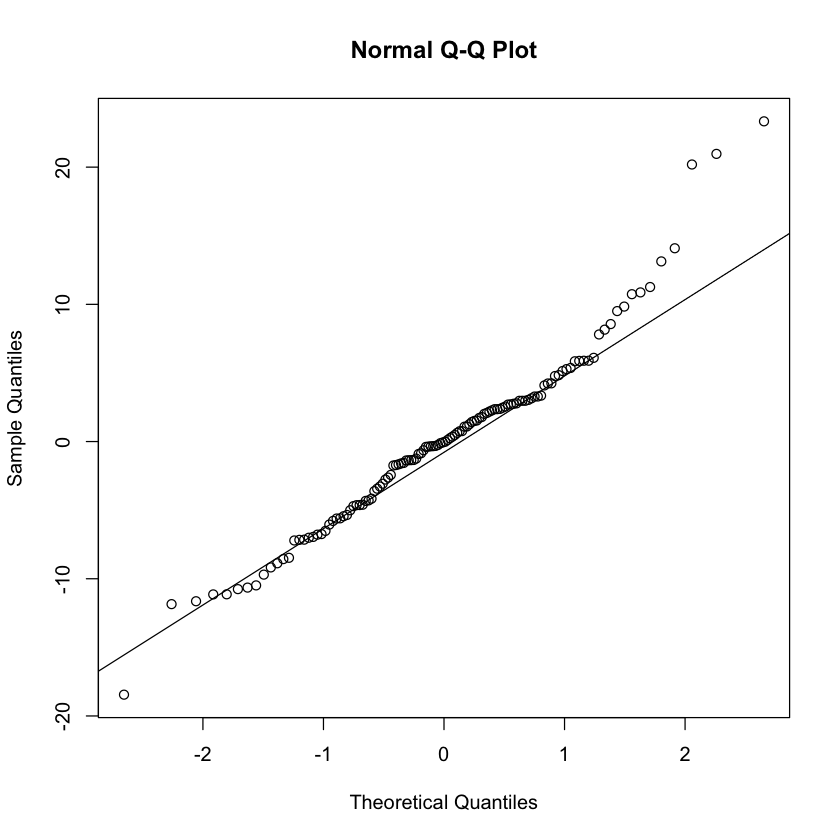

In [23]:
# 残差が正規分布あってはまっているかの確認
qqnorm(resid(lm_late))
qqline(resid(lm_late))

In [24]:
pred <-predict(lm_late)
pred

1        2        3        4        7        8        9       10 
67.02902 65.21004 72.12991 62.64112 59.34347 67.51152 73.71630 64.47307 
      11       13       15       16       17       18       19       20 
71.37918 65.61120 82.64159 78.38957 78.63926 74.36269 70.07223 72.80763 
      21       22       23       24       25       27       29       30 
59.24091 70.88716 63.72024 78.78643 88.16148 73.35094 79.62362 85.56807 
      31       32       33       34       35       36       37       38 
79.49748 64.52250 66.46546 76.64381 69.56009 72.75511 63.78608 69.73868 
      39       40       41       42       43       44       45       46 
61.28112 79.15119 56.81620 68.44339 69.16500 65.44820 71.43812 64.28786 
      47       48       51       52       53       55       56       57 
76.59470 84.27609 71.45274 79.06577 68.17441 71.72902 59.34722 73.30571 
      58       59       60       62       63       64       66       67 
76.66138 83.76868 82.87236 77.62869 61.75802 66.59661 64.71149 61.69873 
      68       69       70       72       74       75       76       77 
63.74432 58.65228 60.05104 77.32593 66.62527 66.49099 72.98291 59.43519 
      78       79       80       81       82       83       84       85 
75.90951 74.73768 62.57642 64.64426 82.16467 65.03388 62.43118 61.36723 
      86       87       90       91       92       93       94       95 
79.24530 84.26060 66.03037 76.11932 74.89876 61.63543 73.70865 69.21162 
      96       97       98       99      102      103      104      105 
69.16280 65.74455 81.29136 72.12062 54.15011 71.84954 77.02678 81.25001 
     106      107      108      109      110      111      112      113 
66.95041 69.75579 59.31823 64.01121 69.48433 70.23838 84.77037 73.63610 
     114      116      117      118      119      120      121      122 
68.85164 59.86244 62.91625 59.53249 63.60470 59.22448 81.00719 55.84450 
     123      124      125      126      128      129      130      134 
75.13385 66.90059 77.35541 79.87059 64.96433 63.91457 63.71900 75.33607 
     135      137      140      141      142      143      144      145 
76.01246 58.24694 79.14106 74.36779 67.61462 58.91278 77.10751 65.90510 
     148      150      151      153      154      155 
74.85073 70.10959 68.19534 78.66179 77.21717 76.63711

In [25]:
late_country$pred = pred

125 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
118 codes from the map weren't represented in your data


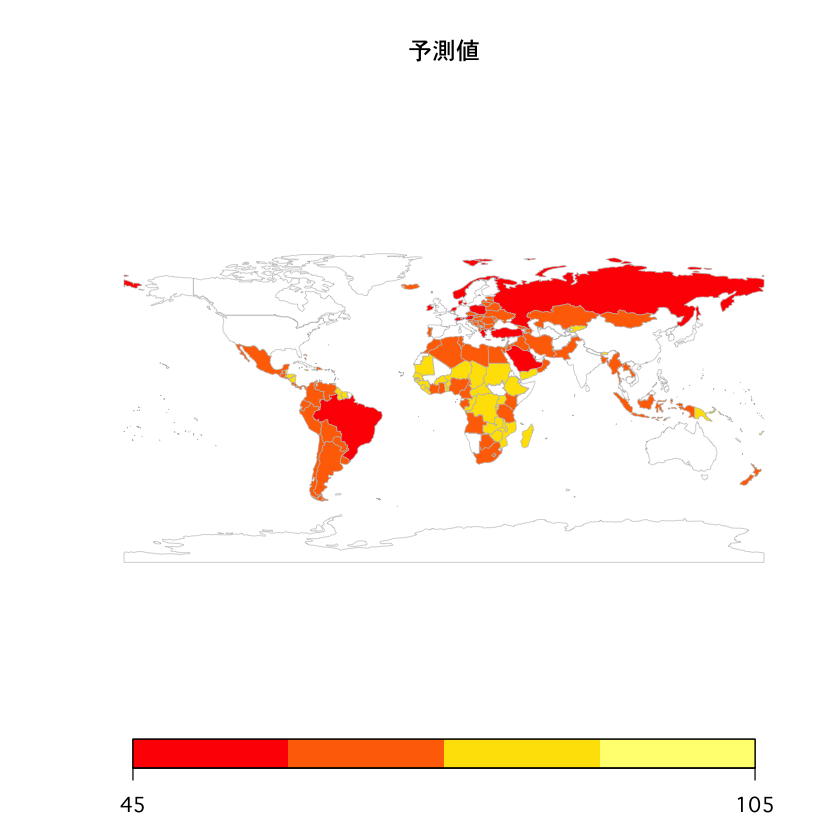

In [26]:
map_obj <- joinCountryData2Map(late_country, joinCode="NAME", nameJoinColumn="country")
par(family="Osaka")
mapCountryData(map_obj, nameColumnToPlot="pred"
               , mapTitle = "予測値"
               #, catMethod="fixedWidth"
               , catMethod=c(45,60,75,90, 105)
               , colourPalette=heat.colors(5)
               #,colourPalette=c("#A6CEE3", "#B2DF8A", "#FB9A99") # 赤、緑、青
               #,colourPalette=b.col
               , addLegend = TRUE)

125 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
118 codes from the map weren't represented in your data


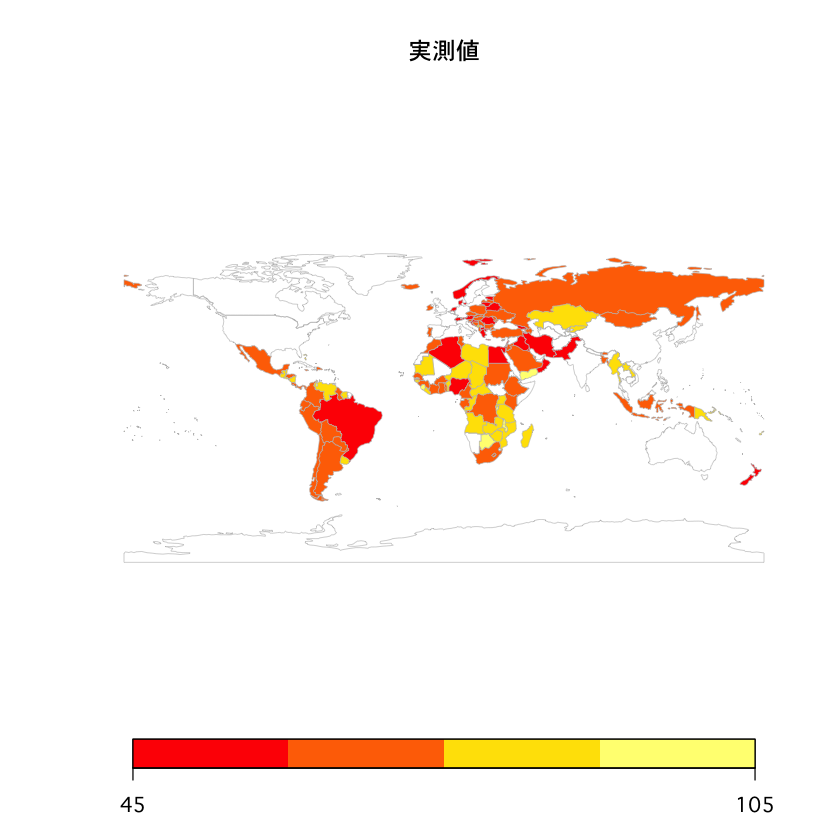

In [27]:
map_obj <- joinCountryData2Map(late_country, joinCode="NAME", nameJoinColumn="country")
par(family="Osaka")
mapCountryData(map_obj, nameColumnToPlot="date_first"
               , mapTitle = "実測値"
               #, catMethod="fixedWidth"
               , catMethod=c(45,60,75,90, 105)
               , colourPalette=heat.colors(5)
               #,colourPalette=c("#A6CEE3", "#B2DF8A", "#FB9A99") # 赤、緑、青
               #,colourPalette=b.col
               , addLegend = TRUE)

- 色の範囲の調整の仕方  
https://stackoverflow.com/questions/24197631/rworldmap-color-scale-not-continuous/24202094

# 地理的加重回帰モデル

In [28]:
# install.packages("spgwr")
library(spgwr)

Loading required package: spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

NOTE: This package does not constitute approval of GWR
as a method of spatial analysis; see example(gwr)



In [29]:
lm_late <- lm(formula = date_first ~ log(pop) + log(gdp) + urb + detection + dist_italy, data = late_country)
summary(lm_late)
AIC(lm_late)


Call:
lm(formula = date_first ~ log(pop) + log(gdp) + urb + detection + 
    dist_italy, data = late_country)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.4482  -4.5350  -0.0391   2.9727  23.3382 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.465e+02  1.072e+01  13.669  < 2e-16 ***
log(pop)    -1.978e+00  4.229e-01  -4.678 7.67e-06 ***
log(gdp)    -4.086e+00  8.879e-01  -4.602 1.05e-05 ***
urb         -9.246e-02  4.496e-02  -2.057  0.04189 *  
detection   -8.079e-02  3.307e-02  -2.443  0.01602 *  
dist_italy   5.489e-07  1.677e-07   3.274  0.00139 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.759 on 120 degrees of freedom
Multiple R-squared:  0.5705,	Adjusted R-squared:  0.5526 
F-statistic: 31.88 on 5 and 120 DF,  p-value: < 2.2e-16


[1] 846.9666

In [81]:
loc <-cbind(late_country$lon, late_country$lat)

In [82]:
late.bw <- gwr.sel(date_first ~ log(pop) + log(gdp) + urb + detection + dist_italy, data = late_country, coords = loc)
late.gauss <- gwr(date_first ~ log(pop) + log(gdp) + urb + detection + dist_italy, data = late_country, coords=loc, bandwidth=late.bw, hatmatrix=T)



Bandwidth: 113.5987 CV score: 5989.727 
Bandwidth: 183.6231 CV score: 6019.548 
Bandwidth: 70.32128 CV score: 5915.213 
Bandwidth: 43.57436 CV score: 6013.563 
Bandwidth: 80.79409 CV score: 5933.565 
Bandwidth: 60.10487 CV score: 5913.026 
Bandwidth: 63.77376 CV score: 5910.742 
Bandwidth: 64.37545 CV score: 5910.759 
Bandwidth: 63.98349 CV score: 5910.737 
Bandwidth: 63.97149 CV score: 5910.737 
Bandwidth: 63.97032 CV score: 5910.737 
Bandwidth: 63.97027 CV score: 5910.737 
Bandwidth: 63.97023 CV score: 5910.737 
Bandwidth: 63.97027 CV score: 5910.737 


In [83]:
late.gauss

Call:
gwr(formula = date_first ~ log(pop) + log(gdp) + urb + detection + 
    dist_italy, data = late_country, coords = loc, bandwidth = late.bw, 
    hatmatrix = T)
Kernel function: gwr.Gauss 
Fixed bandwidth: 63.97027 
Summary of GWR coefficient estimates at data points:
                    Min.     1st Qu.      Median     3rd Qu.        Max.
X.Intercept.  1.4100e+02  1.4204e+02  1.4318e+02  1.4482e+02  1.5822e+02
log.pop.     -2.3933e+00 -2.0575e+00 -2.0223e+00 -1.9874e+00 -1.8982e+00
log.gdp.     -4.8872e+00 -3.7789e+00 -3.5616e+00 -3.5060e+00 -3.4483e+00
urb          -1.9461e-01 -1.1657e-01 -1.0550e-01 -8.9719e-02 -6.1653e-03
detection    -1.0407e-01 -9.4273e-02 -9.0283e-02 -8.6975e-02 -4.5287e-02
dist_italy    7.9096e-08  6.3062e-07  7.6935e-07  7.9965e-07  8.7778e-07
               Global
X.Intercept. 146.5061
log.pop.      -1.9783
log.gdp.      -4.0861
urb           -0.0925
detection     -0.0808
dist_italy     0.0000
Number of data points: 126 
Effective number of parameters (r

In [84]:
LMZ.F3GWR.test(late.gauss)

ERROR: Error in solve.default(t(x) %*% diag(wj) %*% x):  システムは数値的に特異です: 条件数の逆数 = 1.42317e-16 


In [85]:
late.coef <- data.frame(late.gauss$SDF@data[, 2:7])
head(late.coef)

,X.Intercept.,log.pop.,log.gdp.,urb,detection,dist_italy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,141.9123,-1.993567,-3.535448,-0.10558418,-0.09084778,7.826079e-07
2,142.6774,-2.012750,-3.632571,-0.09762761,-0.08920322,7.522757e-07
3,143.3045,-2.055751,-3.517843,-0.10975846,-0.09902752,8.366275e-07
4,149.4952,-2.164583,-4.396708,-0.04394840,-0.08846734,6.019773e-07
5,141.7407,-1.984520,-3.552370,-0.10315865,-0.08928877,7.675455e-07
6,141.7910,-1.967851,-3.490949,-0.11631005,-0.09294760,7.860444e-07


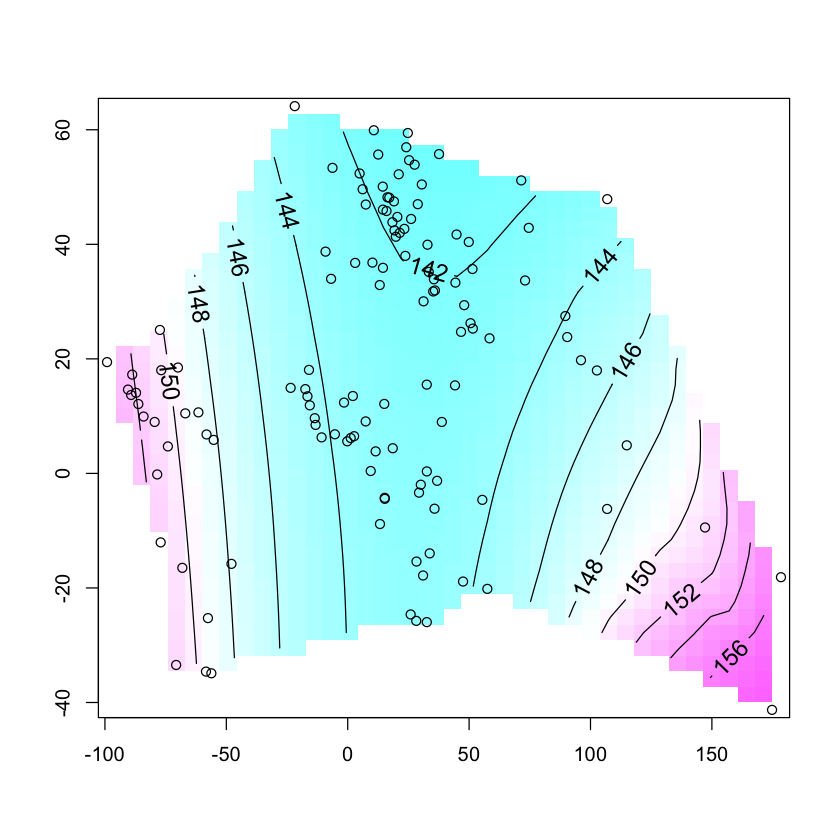

In [89]:
# log.pop
map_pop <- interp(loc[,1], loc[,2], late.coef[,1], linear = F)
image(map_pop, col = cm.colors(100))
contour(map_pop, add = T, labcex=1.2)
points(loc)

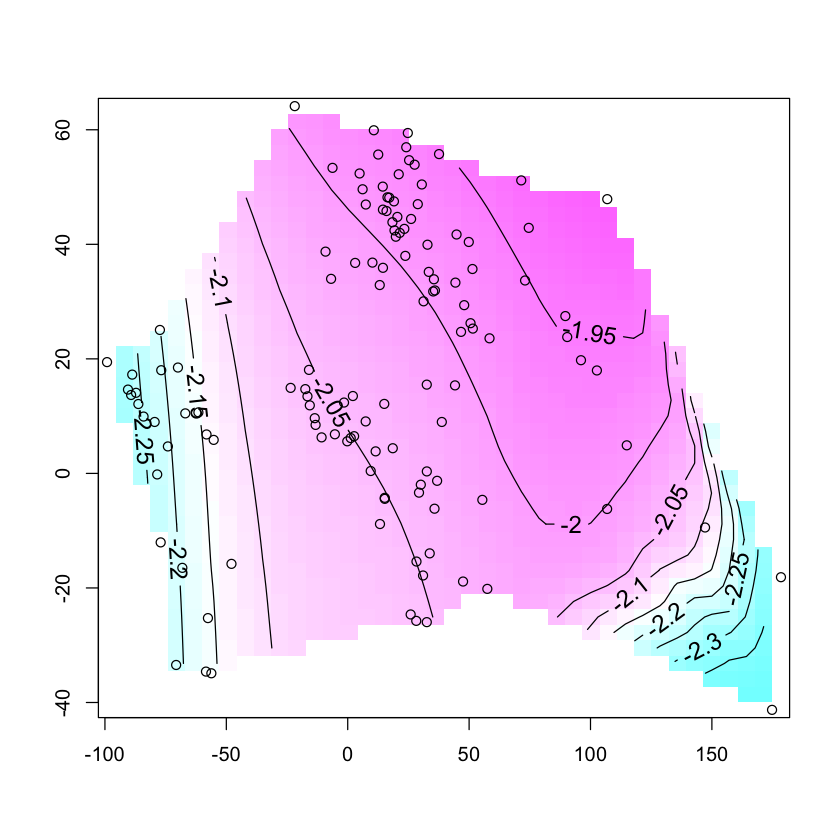

In [91]:
# log.gdp
map_gdp <- interp(loc[,1], loc[,2], late.coef[,2], linear = F)
image(map_gdp, col = cm.colors(100))
contour(map_gdp, add = T, labcex=1.2)
points(loc)

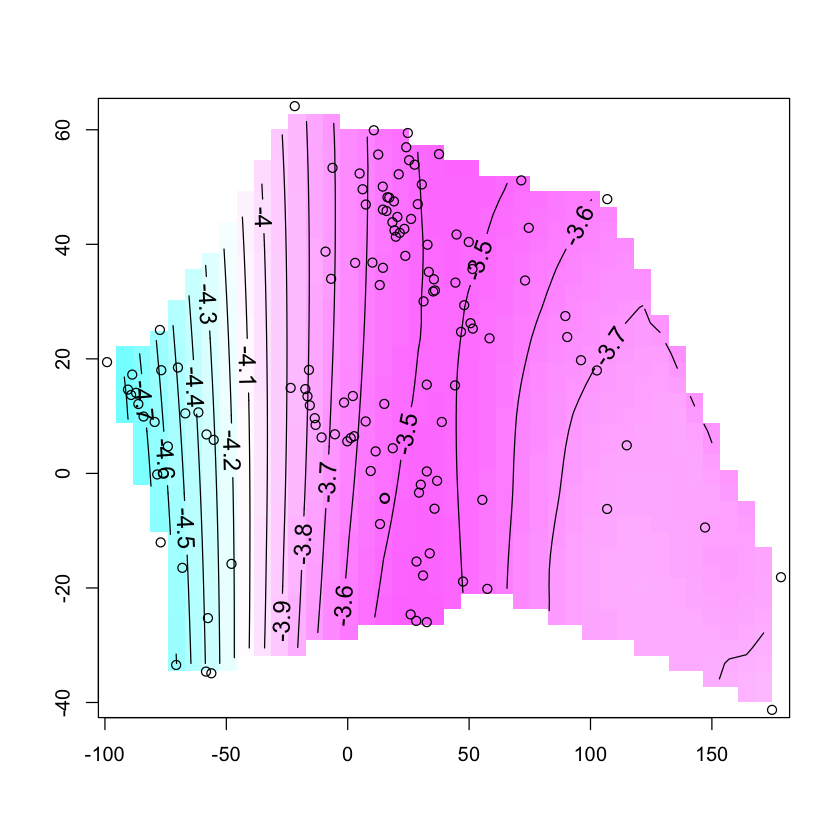

In [93]:
# urb
map_urb <- interp(loc[,1], loc[,2], late.coef[,3], linear = F)
image(map_urb, col = cm.colors(100))
contour(map_urb, add = T, labcex=1.2)
points(loc)

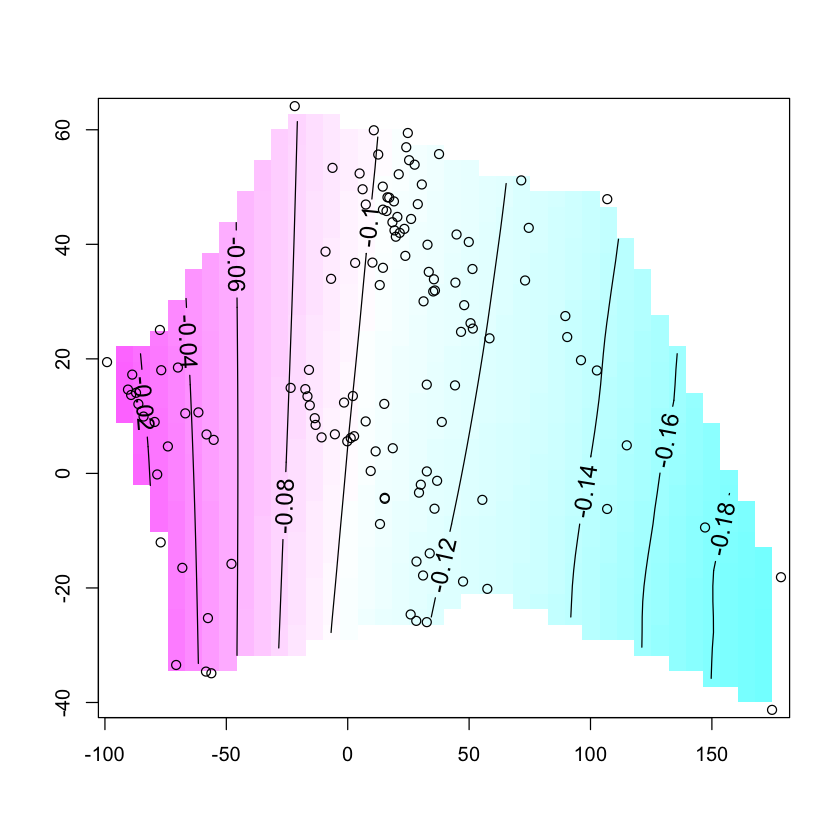

In [94]:
# detection
map_detection <- interp(loc[,1], loc[,2], late.coef[,4], linear = F)
image(map_detection, col = cm.colors(100))
contour(map_detection, add = T, labcex=1.2)
points(loc)

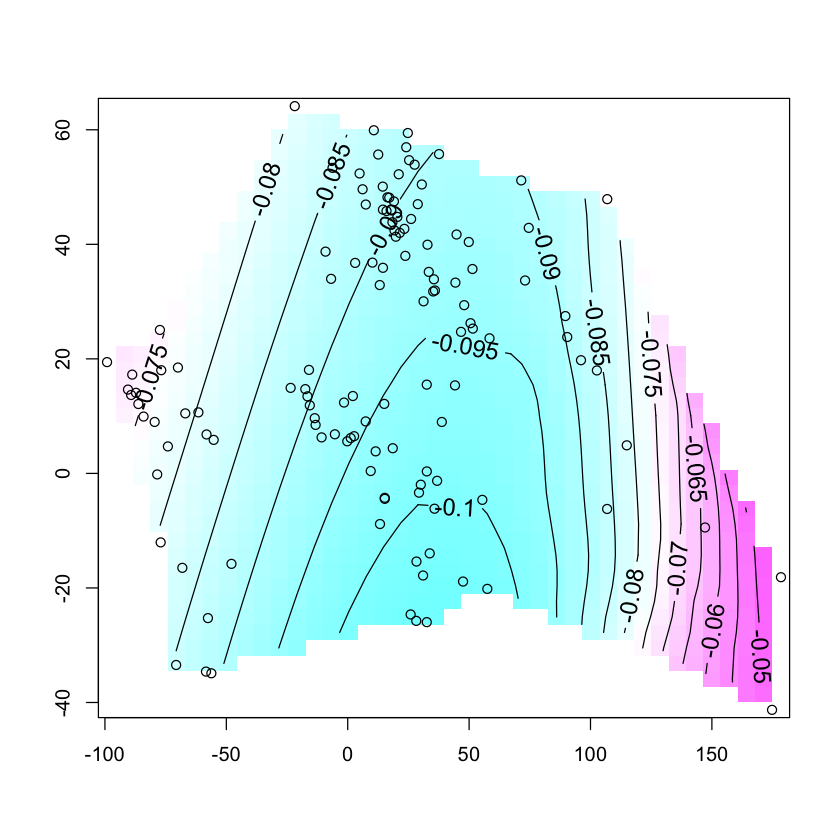

In [95]:
# dist_italy
map_dist <- interp(loc[,1], loc[,2], late.coef[,5], linear = F)
image(map_dist, col = cm.colors(100))
contour(map_dist, add = T, labcex=1.2)
points(loc)

In [98]:
late.coef

,X.Intercept.,log.pop.,log.gdp.,urb,detection,dist_italy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,141.9123,-1.993567,-3.535448,-0.10558418,-0.09084778,7.826079e-07
2,142.6774,-2.012750,-3.632571,-0.09762761,-0.08920322,7.522757e-07
3,143.3045,-2.055751,-3.517843,-0.10975846,-0.09902752,8.366275e-07
4,149.4952,-2.164583,-4.396708,-0.04394840,-0.08846734,6.019773e-07
5,141.7407,-1.984520,-3.552370,-0.10315865,-0.08928877,7.675455e-07
6,141.7910,-1.967851,-3.490949,-0.11631005,-0.09294760,7.860444e-07
7,150.1681,-2.200535,-4.574607,-0.02866832,-0.07453912,5.583025e-07
8,142.4432,-1.987725,-3.505302,-0.11800762,-0.09512029,7.980580e-07
9,144.3110,-1.951387,-3.650688,-0.13183158,-0.08962714,6.313753e-07


In [99]:
late_country$urb_coef = late.coef$urb

125 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
118 codes from the map weren't represented in your data


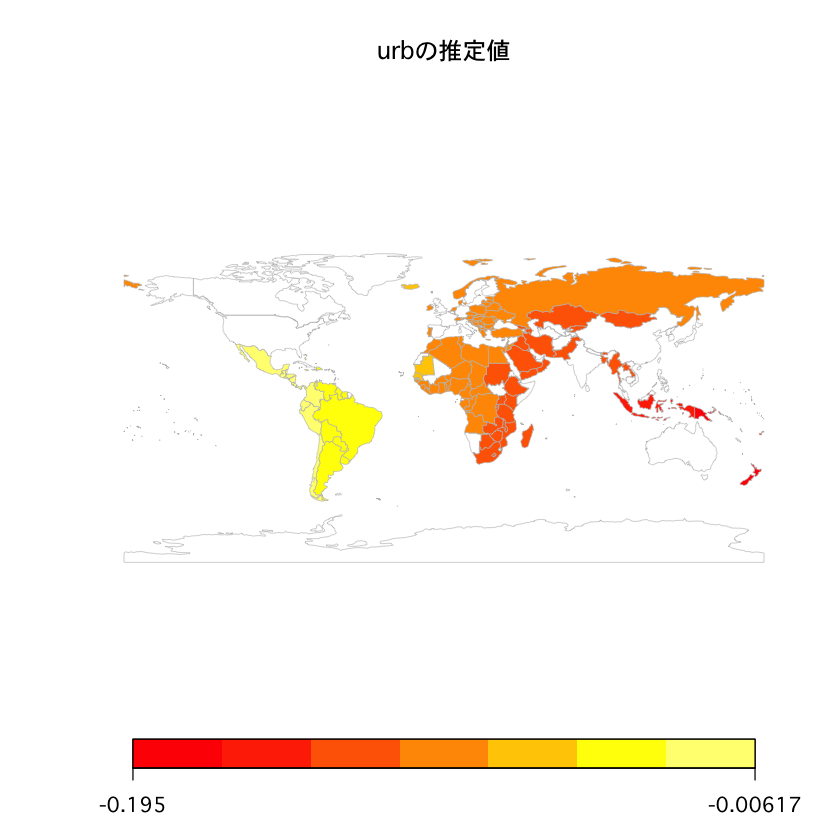

In [102]:
map_obj <- joinCountryData2Map(late_country, joinCode="NAME", nameJoinColumn="country")
par(family="Osaka")
mapCountryData(map_obj, nameColumnToPlot="urb_coef"
               , mapTitle = "urbの推定値"
               , catMethod="fixedWidth"
               #, catMethod=c(45,60,75,90, 105)
               , colourPalette=heat.colors(7)
               #,colourPalette=c("#A6CEE3", "#B2DF8A", "#FB9A99") # 赤、緑、青
               #,colourPalette=b.col
               , addLegend = TRUE)